In [29]:
import json
import matplotlib.pyplot as plt
from numpy import linspace
import matplotlib.axes as ax
import numpy as np
import csv

In [30]:
#Extrai todos os dados dos filmes que já assisti
List1 = []
with open("MovieDataInTXT0.txt") as arqtxt:
    i =0
    for jsonObj in arqtxt:
        i=i+1
        novodict = json.loads(jsonObj)
        List1.append(novodict)

In [31]:
with open("MovieDataInTXT2.txt") as arqtxt:
    i =0
    for jsonObj in arqtxt:
        novodict = json.loads(jsonObj)
        List1.append(novodict)

In [32]:
List = []
with open("MovieDataInTXT1.txt") as arqtxt:
    for jsonObj in arqtxt:
        novodict = json.loads(jsonObj)
        List.append(novodict)

In [33]:
genres ={
 "28":"Action",        
 "12":"Adventure",
 "16":"Animation",
 "35":"Comedy",
 "80":"Crime",
 "99":"Documentary",
 "18":"Drama",
 "10751":"Family",
 "14":"Fantasy",
 "36":"History",
 "27":"Horror",
 "10402":"Music",
 "9648":"Mystery",
 "10749":"Romance",
 "878":"Sci_Fi",
 "10752":"War",
 "53":"Thriller",
 "37":"Western",
}
class genre_data:
    def __init__(self,name):
        self.rating = 0
        self.quantidade = 0
        self.name = (name)
    def __add__(self,nota):
        self.quantidade += 1
        self.rating += nota
    def zerar(self):
        self.rating=0
        self.quantidade=0



In [34]:
def procura_indice_na_lista(lista,chave):
    for i in range(0,len(lista)):
        if chave == lista[i].name:
            return i


In [35]:
def grafico(x,xlabel,y,ylabel,title,xticks,color, **kwargs):
    tick_label = kwargs.get("tick_label",None)
    plt.figure(figsize=(24,12))
    if tick_label is not None:
        plt.bar(x,y,width=0.9,color=color,edgecolor="black",linewidth=1.1,tick_label = tick_label)
    else:
        plt.bar(x,y,width=0.9,color=color,edgecolor="black",linewidth=1.1)
    plt.title(title,size=20,weight='bold')
    plt.grid(True,axis="y")
    plt.ylabel(ylabel,size=18)
    plt.xlabel(xlabel,size=18)
    if tick_label is None:
        plt.xticks(xticks)
    plt.show()

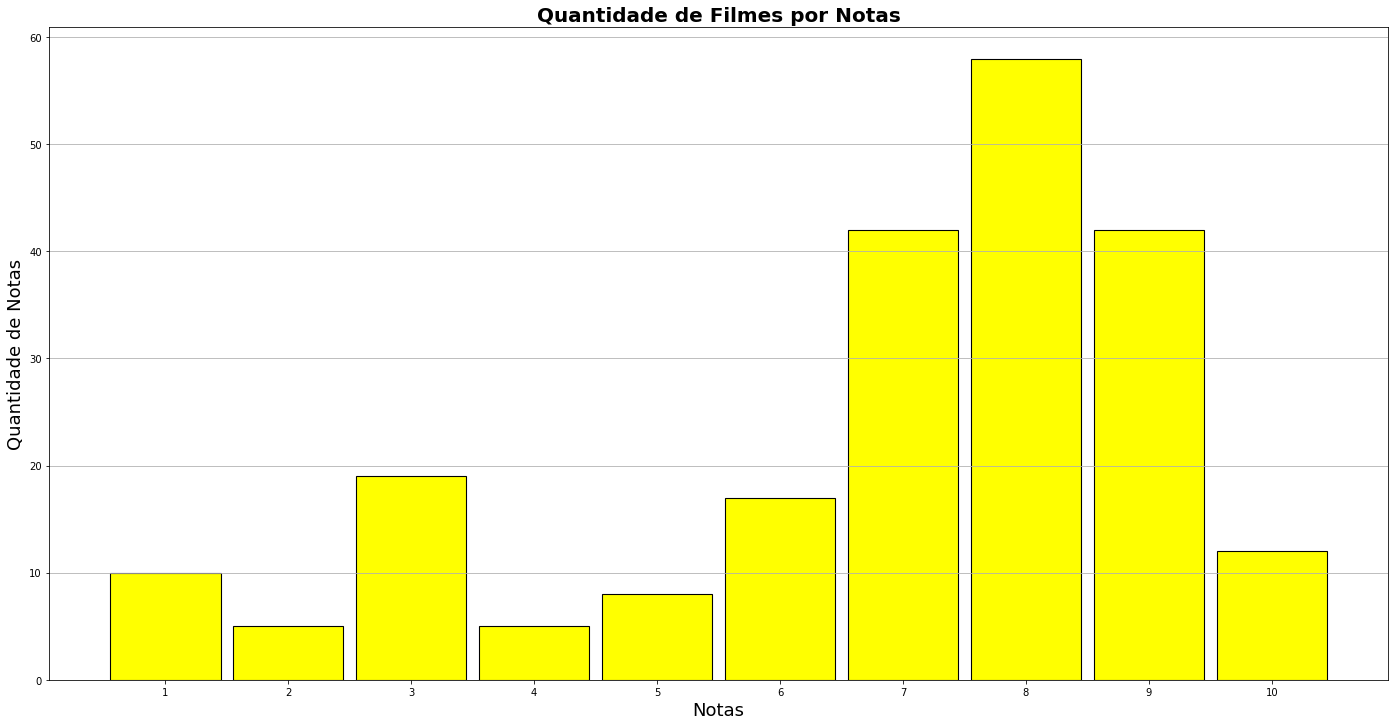

In [36]:
ratings_list = [List[i]['rating'] for i in range(0,len(List))]
y = [ratings_list.count(float(i)) for i in range(1,11)]
x = [i for i in range(1,11)]
grafico(x,"Notas",y,"Quantidade de Notas","Quantidade de Filmes por Notas",x,"yellow")



In [37]:

    Action= genre_data("Action")        
    Adventure= genre_data("Adventure")
    Animation= genre_data("Animation")
    Comedy= genre_data("Comedy")
    Crime= genre_data("Crime")
    Documentary= genre_data("Documentary")
    Drama= genre_data("Drama")
    Family= genre_data("Family")
    Fantasy= genre_data("Fantasy")
    History= genre_data("History")
    Horror= genre_data("Horror")
    Music= genre_data("Music")
    Mystery= genre_data("Mystery")
    Romance= genre_data("Romance")
    Sci_Fi= genre_data("Sci_Fi")
    Thriller= genre_data("Thriller")
    War= genre_data("War")
    Western= genre_data("Western")

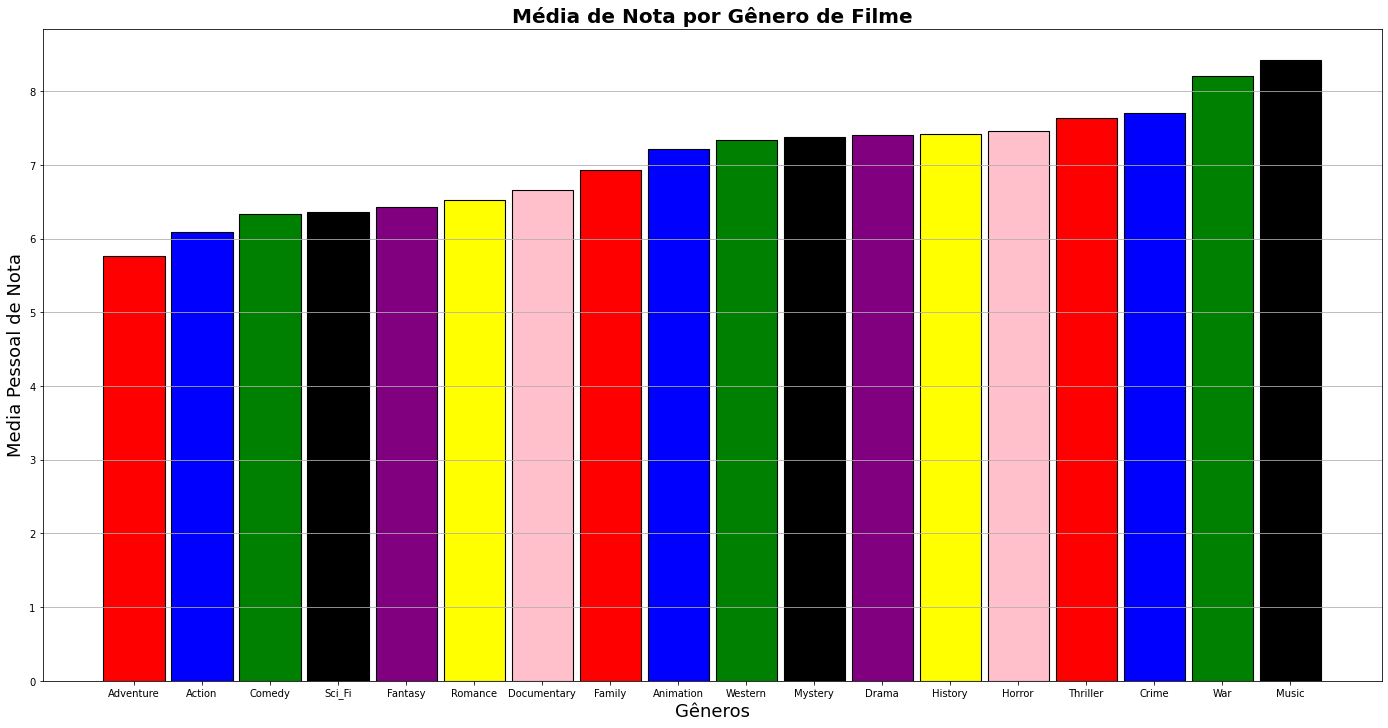

In [38]:

classes_de_generos=[Action, Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Sci_Fi,War,Thriller,Western]
for i in range(0,len(List)):
    for genre in List[i]['genre_ids']:
        indice_do_genero_na_lista = procura_indice_na_lista(classes_de_generos,genres[f"{genre}"])
        classes_de_generos[indice_do_genero_na_lista]+List[i]['rating']
       # if classes_de_generos[indice_do_genero_na_lista].name =='Family':
          #  print(List[i]['original_title'])
y=[]
for i in range(0,len(classes_de_generos)):
    if classes_de_generos[i].quantidade != 0:
        y.append(classes_de_generos[i].rating/classes_de_generos[i].quantidade)
    else:
        y.append(0)
x= [x for x in range(0,len(classes_de_generos))]
tick_label=[classes_de_generos[x].name for x in range(0,len(classes_de_generos))]
xticks=[x for x in range(0,len(classes_de_generos))]
lista_zippada = zip(y,tick_label)
pares_arrumados = sorted(lista_zippada)
tuples = zip(*pares_arrumados)
y,tick_label = [list(tuple) for tuple in tuples]
grafico(x,"Gêneros",y,"Media Pessoal de Nota","Média de Nota por Gênero de Filme",xticks,("red","blue","green","black","purple","yellow","pink"),tick_label=tick_label)


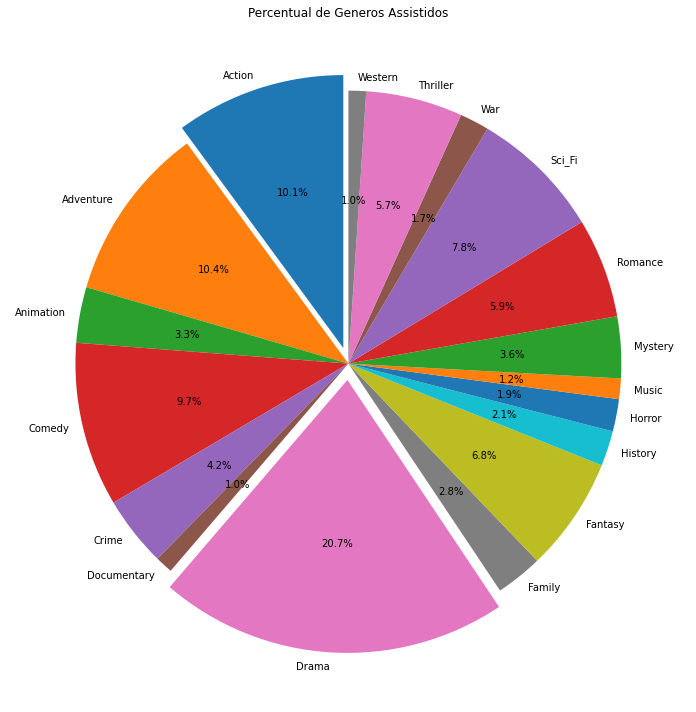

In [39]:
#GRAFICO PIZZA POR GENERO/QUANTIDADE:
classes_de_generos=[Action, Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Sci_Fi,War,Thriller,Western]
for i in range(0,len(List)):
    for genre in List[i]['genre_ids']:
        indice_do_genero_na_lista = procura_indice_na_lista(classes_de_generos,genres[f"{genre}"])
        classes_de_generos[indice_do_genero_na_lista].quantidade+=1
        
y=[]

for i in range(0,len(classes_de_generos)):
    y.append(classes_de_generos[i].quantidade) 
total = sum(y)
sizes = [classes_de_generos[i].quantidade/total for i in range(0,len(classes_de_generos))]
explode = [0.06,0,0,0,0,0,0.06,0,0,0,0,0,0,0,0,0,0,0]
x= [x for x in range(0,len(classes_de_generos))]
tick_label=[classes_de_generos[x].name for x in range(0,len(classes_de_generos))]
xticks=[x for x in range(0,len(classes_de_generos))]

fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(sizes,explode=explode,labels=tick_label,autopct='%1.1f%%',startangle=90,labeldistance=1.05)
plt.title("Percentual de Generos Assistidos")
fig1.tight_layout()
#grafico(x,"Gêneros",y,"Media Pessoal de Nota","Média de Nota por Gênero de Filme",xticks,"purple",tick_label=tick_label)


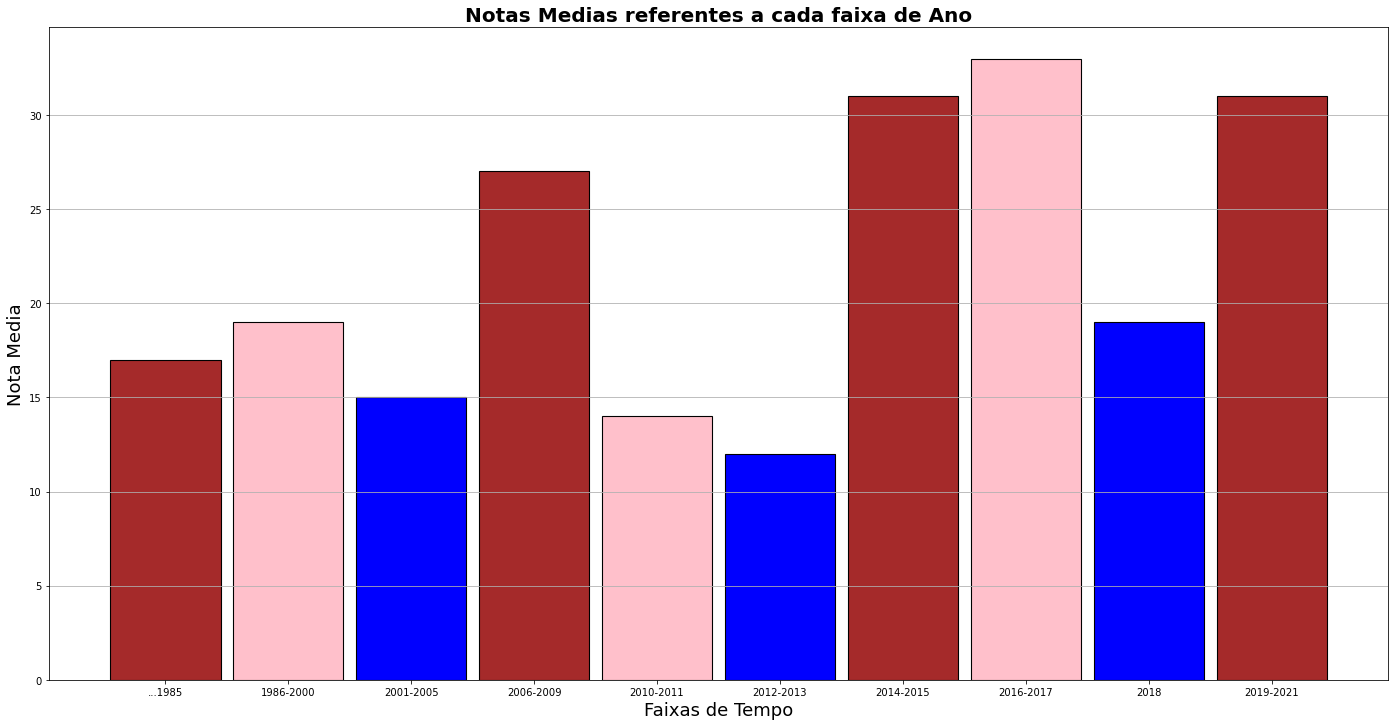

In [40]:
#Minhas notas referentes à épocas diferentes:
anos_dos_filmes = [x for x in range(1930,2022)]
lista_com_ratings = [0 for x in range(0,len(anos_dos_filmes))]
lista_com_quantidade = [0 for x in range(0,len(anos_dos_filmes))]
for i in range(0,len(List)):
    ano_de_release = int(List[i]["release_date"][:4])
    indice_na_lista = ano_de_release - 1930
    lista_com_ratings[indice_na_lista]+=List[i]["rating"]
    lista_com_quantidade[indice_na_lista]+=1
xticks=["...1985","1986-2000","2001-2005","2006-2009","2010-2011","2012-2013","2014-2015","2016-2017","2018","2019-2021"]
quantidade_por_faixa = [0] * len(xticks)
rating_por_faixa = [0] * len(xticks)
for i in range(0,len(anos_dos_filmes)):
    x= i+1930
    if x <1986:
        quantidade_por_faixa[0] += lista_com_quantidade[i]
        rating_por_faixa[0]+=lista_com_ratings[i]
    elif x <2001:
        quantidade_por_faixa[1] += lista_com_quantidade[i]
        rating_por_faixa[1]+=lista_com_ratings[i]
    elif x <2006:
        quantidade_por_faixa[2] += lista_com_quantidade[i]
        rating_por_faixa[2]+=lista_com_ratings[i]
    elif x <2010:
        quantidade_por_faixa[3] += lista_com_quantidade[i]
        rating_por_faixa[3]+=lista_com_ratings[i]
    elif x <2012:
        quantidade_por_faixa[4] += lista_com_quantidade[i]
        rating_por_faixa[4]+=lista_com_ratings[i]
    elif x <2014:
        quantidade_por_faixa[5] += lista_com_quantidade[i]
        rating_por_faixa[5]+=lista_com_ratings[i] 
    elif x <2016:
        quantidade_por_faixa[6] += lista_com_quantidade[i]
        rating_por_faixa[6]+=lista_com_ratings[i]
    elif x <2018:
        quantidade_por_faixa[7] += lista_com_quantidade[i]
        rating_por_faixa[7]+=lista_com_ratings[i]
    elif x <2019:
        quantidade_por_faixa[8] += lista_com_quantidade[i]
        rating_por_faixa[8]+=lista_com_ratings[i]
    else:
        quantidade_por_faixa[9] += lista_com_quantidade[i]
        rating_por_faixa[9]+=lista_com_ratings[i]

#media_por_faixa = [rating_por_faixa[i]/quantidade_por_faixa[i] for i in range(0,len(xticks))]
media_por_faixa = [quantidade_por_faixa[i] for i in range(0,len(xticks))]
x = [i for i in range(0,len(xticks))]
y = [i for i in range(0,len(xticks))]
grafico(x,"Faixas de Tempo",media_por_faixa,"Nota Media","Notas Medias referentes a cada faixa de Ano",y,("brown","pink","blue"),tick_label = xticks)


In [41]:
def media_por_faixa(valores,List,lista_estudada,palavra_chave_List):
    quantidade_por_faixa = [0] * len(valores)
    rating_por_faixa = [0] * len(valores) 
    for i in range(0,len(lista_estudada)):
        for j in range(0,len(valores)):
            if lista_estudada[i] < valores[j]:
                quantidade_por_faixa[j] += 1
                rating_por_faixa[j]+= List[i][palavra_chave_List]
                break
    medias_por_faixa =[rating_por_faixa[i]/quantidade_por_faixa[i] for i in range(0,len(valores))]
    return medias_por_faixa

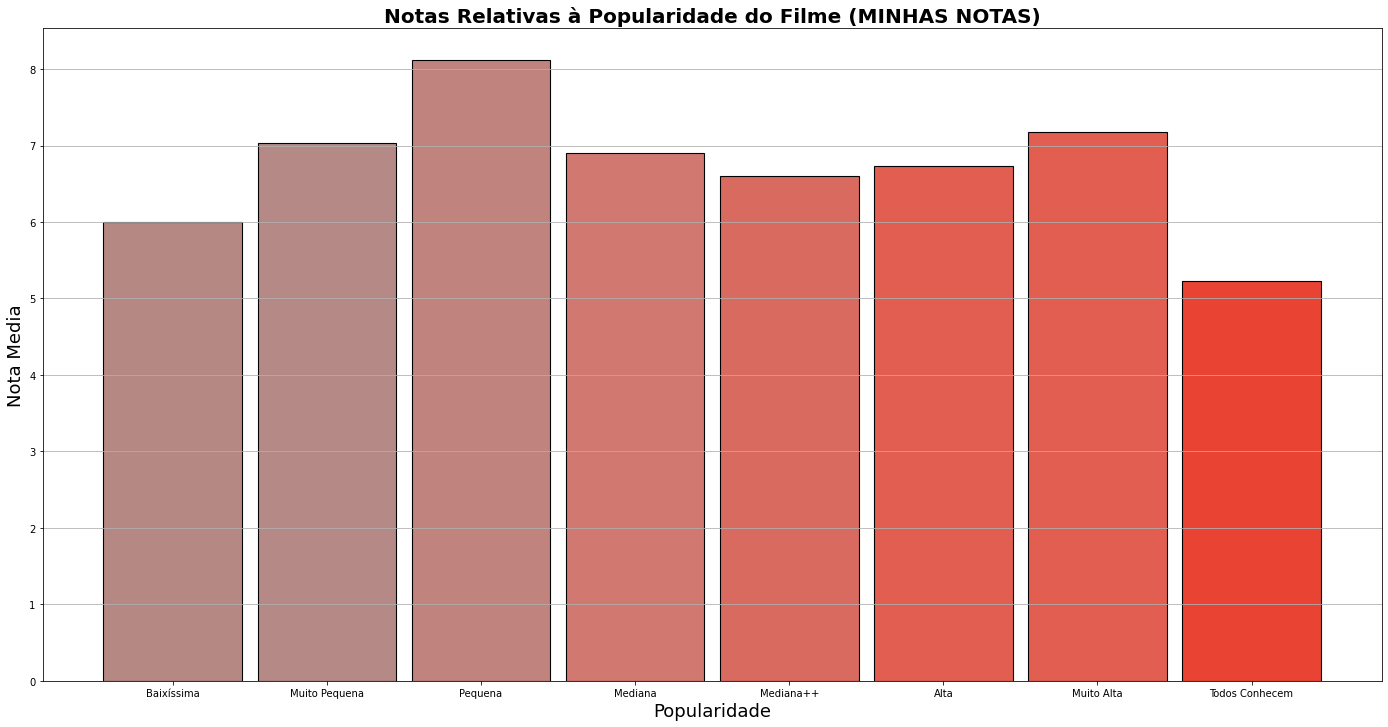

In [42]:
#Relação notas e Popularidade
popularidades = [List[i]['popularity'] for i in range(0,len(List))]
tick_label= ["Baixíssima","Muito Pequena","Pequena","Mediana","Mediana++","Alta","Muito Alta","Todos Conhecem"]
valores = [10,18,26,37,62,83,110,600]
media_das_faixas = media_por_faixa(valores,List,popularidades,'rating')
x = [i for i in range(0,len(tick_label))]
y = [i for i in range(0,len(tick_label))]
grafico(x,"Popularidade",media_das_faixas,"Nota Media","Notas Relativas à Popularidade do Filme (MINHAS NOTAS)",y,("#B68884","#B58A86","#C1837D","#D17970","#D86A5F","#E15E51","#E15E51","#E94333"),tick_label = tick_label)

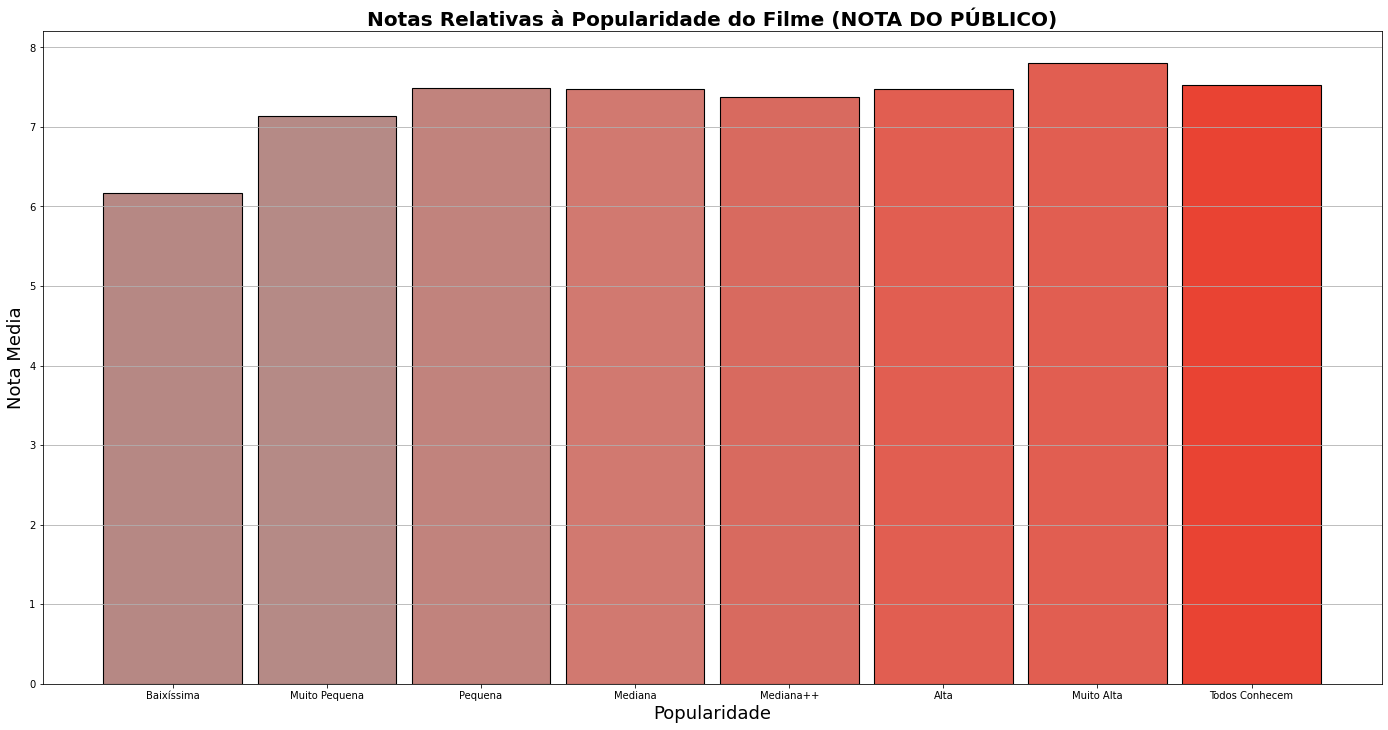

In [43]:
popularidades = [List[i]['popularity'] for i in range(0,len(List))]

tick_label= ["Baixíssima","Muito Pequena","Pequena","Mediana","Mediana++","Alta","Muito Alta","Todos Conhecem"]
valores = [10,18,26,37,62,83,110,600]
media_das_faixas = media_por_faixa(valores,List,popularidades,'vote_average')
x = [i for i in range(0,len(tick_label))]
y = [i for i in range(0,10)]
grafico(x,"Popularidade",media_das_faixas,"Nota Media","Notas Relativas à Popularidade do Filme (NOTA DO PÚBLICO)",y,("#B68884","#B58A86","#C1837D","#D17970","#D86A5F","#E15E51","#E15E51","#E94333"),tick_label = tick_label)

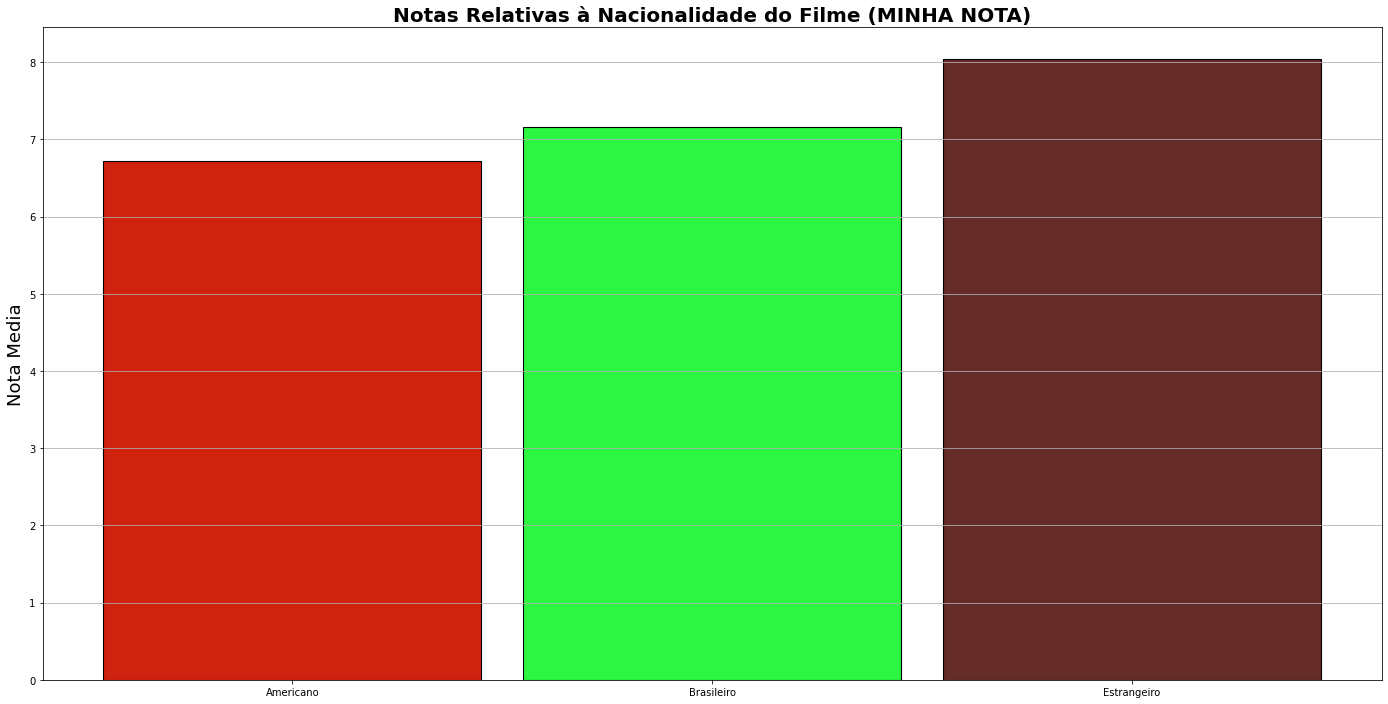

In [44]:
#"original_language"
quantidade_por_faixa=[0,0,0]
rating_por_faixa=[0,0,0]
for i in range(0,len(List)):
    if List[i]["original_language"] =='en':
        quantidade_por_faixa[0]+=1
        rating_por_faixa[0]+=List[i]['rating']
    elif List[i]["original_language"] =="pt":
        quantidade_por_faixa[1]+=1
        rating_por_faixa[1]+=List[i]['rating']
    else:
        quantidade_por_faixa[2]+=1
        rating_por_faixa[2]+=List[i]['rating']
        
media_por_faixa=[rating_por_faixa[i]/quantidade_por_faixa[i] for i in range(0,len(quantidade_por_faixa))]
tick_label= ["Americano","Brasileiro","Estrangeiro"]
x = [i for i in range(0,len(tick_label))]
y = [i for i in range(0,len(tick_label))]
grafico(x,"",media_por_faixa,"Nota Media","Notas Relativas à Nacionalidade do Filme (MINHA NOTA)",y,("#CF230F","#2CF641","#662C27"),tick_label = tick_label)

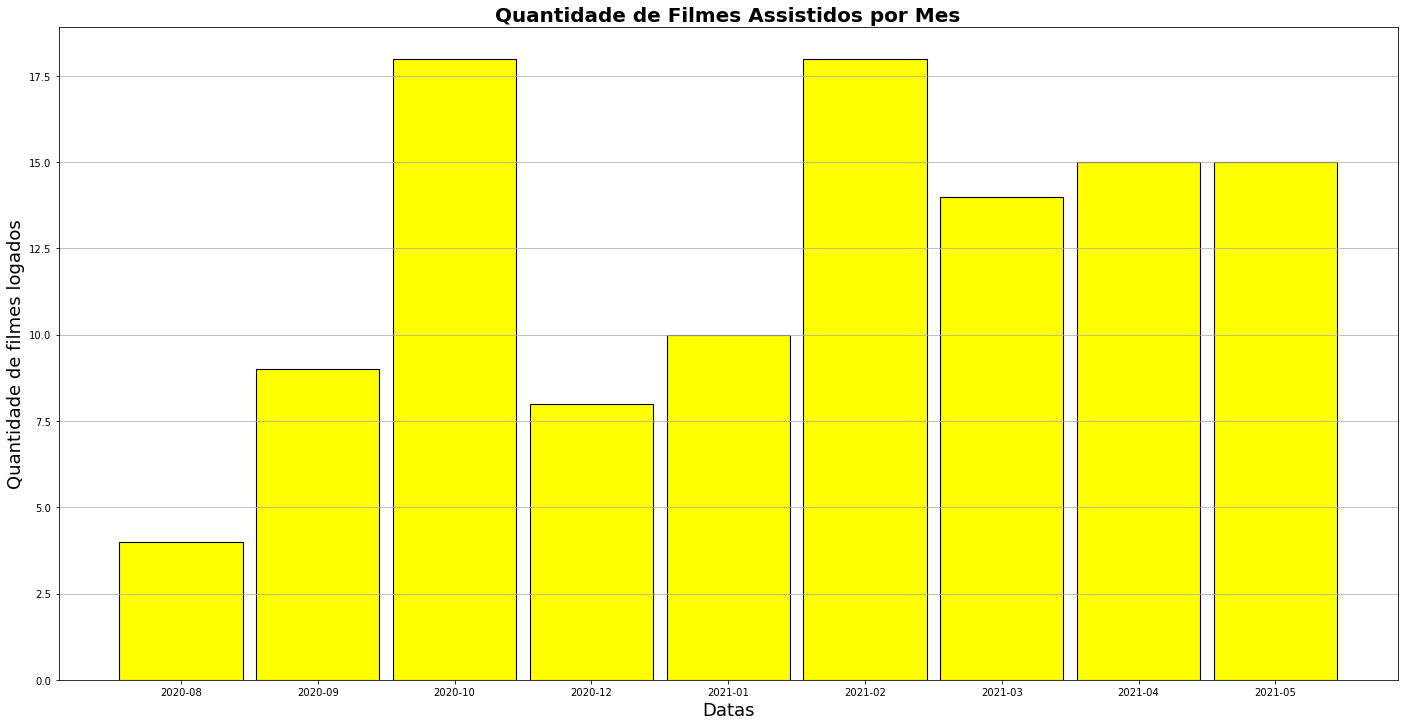

In [85]:
lista_datas = []
with open(f'ratings1.csv', 'r') as my_ratings:
    my_ratings = csv.DictReader(my_ratings)
    for movie in my_ratings:
        lista_datas.append(movie["Date"])
dict_de_faixa_de_datas = {}
for datas in lista_datas:
    dict_de_faixa_de_datas[f"{datas[0:7]}"] = 0
for datas in lista_datas:
    dict_de_faixa_de_datas[f"{datas[0:7]}"] = dict_de_faixa_de_datas[f"{datas[0:7]}"] +1

lista_das_chaves =list(dict_de_faixa_de_datas.keys())
lista_dos_valores =list(dict_de_faixa_de_datas.values())
lista_das_chaves.remove(lista_das_chaves[0])
lista_das_chaves.remove(lista_das_chaves[0])
lista_dos_valores.remove(lista_dos_valores[0])
lista_dos_valores.remove(lista_dos_valores[0])
# lista_dos_valores.remove(lista_dos_valores[3])
# lista_das_chaves.remove(lista_das_chaves[3])
x = [i for i in range(0,len(lista_dos_valores))]
# grafico(x,"Datas",list(dict_de_faixa_de_datas.values()),"Quantidade de filmes logados","Quantidade de Filmes Assistidos por Mes",list(dict_de_faixa_de_datas.keys()),"yellow")
grafico(x,"Datas",lista_dos_valores,"Quantidade de filmes logados","Quantidade de Filmes Assistidos por Mes",x,"yellow",tick_label= lista_das_chaves)
















    

In [ ]:
d = {"a": 2}
d["a"] = d["a"] +1
print(d)

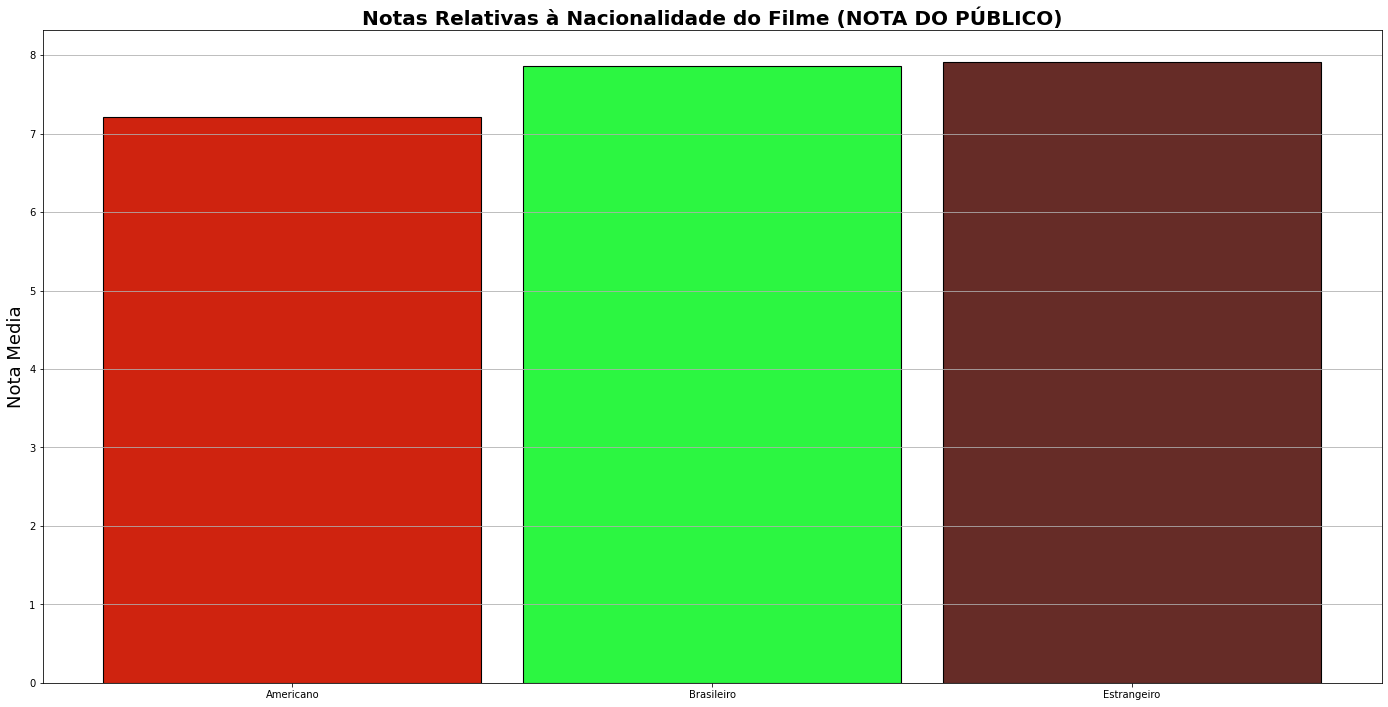

In [319]:
#"original_language"
quantidade_por_faixa=[0,0,0]
rating_por_faixa=[0,0,0]
for i in range(0,len(List)):
    if List[i]["original_language"] =='en':
        quantidade_por_faixa[0]+=1
        rating_por_faixa[0]+=List[i]['vote_average']
    elif List[i]["original_language"] =="pt":
        quantidade_por_faixa[1]+=1
        rating_por_faixa[1]+=List[i]['vote_average']
    else:
        quantidade_por_faixa[2]+=1
        rating_por_faixa[2]+=List[i]['vote_average']
        
media_por_faixa=[rating_por_faixa[i]/quantidade_por_faixa[i] for i in range(0,len(quantidade_por_faixa))]
tick_label= ["Americano","Brasileiro","Estrangeiro"]
x = [i for i in range(0,len(tick_label))]
y = [i for i in range(0,len(tick_label))]
grafico(x,"",media_por_faixa,"Nota Media","Notas Relativas à Nacionalidade do Filme (NOTA DO PÚBLICO)",y,("#CF230F","#2CF641","#662C27"),tick_label = tick_label)

In [320]:
def media_por_faixa1(valores,List,lista_estudada,palavra_chave_List):
    quantidade_por_faixa = [0] * len(valores)
    rating_por_faixa = [0] * len(valores) 
    for i in range(0,len(lista_estudada)):
        for j in range(0,len(valores)):
            if lista_estudada[i] < valores[j]:
                quantidade_por_faixa[j] += 1
                rating_por_faixa[j]+= List[i][palavra_chave_List]
                break
    medias_por_faixa =[rating_por_faixa[i]/quantidade_por_faixa[i] for i in range(0,len(valores))]
    return medias_por_faixa

In [321]:
def grafico_duplo(x1,x2,xlabel,y1,y2,ylabel,title,xticks,color1,color2, **kwargs):
    tick_label = kwargs.get("tick_label",None)
    fig= plt.figure(figsize=(24,12))
    ax = fig.add_subplot(111)
    ax.bar(x1,y1,width=0.40,color=color1,edgecolor="black",linewidth=1.1,tick_label = tick_label)
    ax.bar(x2,y2,width=0.40,color=color2,edgecolor="black",linewidth=1.1)
    plt.title(title,size=20,weight='bold')
    plt.grid(True,axis="y")
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    if tick_label is None:
        plt.xticks(xticks)
    plt.show()

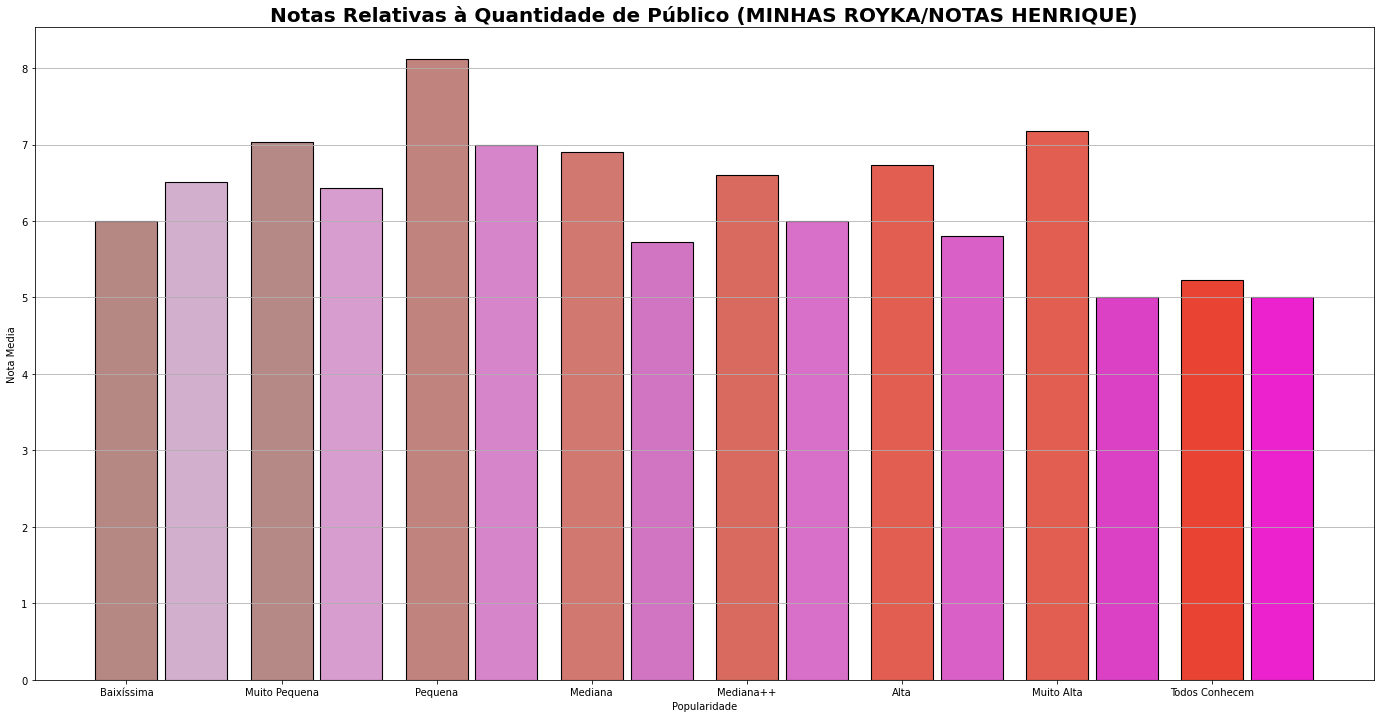

In [322]:
#Relação notas e Popularidade
popularidades = [List[i]['popularity'] for i in range(0,len(List))]
popularidades1 = [List1[i]['popularity'] for i in range(0,len(List1))]
tick_label= ["Baixíssima","Muito Pequena","Pequena","Mediana","Mediana++","Alta","Muito Alta","Todos Conhecem"]
valores = [10,18,26,37,62,83,110,600]
media_das_faixas = media_por_faixa1(valores,List,popularidades,'rating')
media_das_faixas1 = media_por_faixa1(valores,List1,popularidades1,'rating')
x1 = [i for i in range(0,len(tick_label))]
x2 = [x+0.45 for x in x1]
y = [i for i in range(0,len(tick_label))]
grafico_duplo(x1,x2,"Popularidade",media_das_faixas,media_das_faixas1,"Nota Media","Notas Relativas à Quantidade de Público (MINHAS ROYKA/NOTAS HENRIQUE)",y,("#B68884","#B58A86","#C1837D","#D17970","#D86A5F","#E15E51","#E15E51","#E94333"),("#D3AFCE","#D69DCE","#D685CA","#D175C3","#D86FC8","#D860C6","#DB41C4","#EB22CD"),tick_label = tick_label)

In [323]:

    Action= genre_data("Action")        
    Adventure= genre_data("Adventure")
    Animation= genre_data("Animation")
    Comedy= genre_data("Comedy")
    Crime= genre_data("Crime")
    Documentary= genre_data("Documentary")
    Drama= genre_data("Drama")
    Family= genre_data("Family")
    Fantasy= genre_data("Fantasy")
    History= genre_data("History")
    Horror= genre_data("Horror")
    Music= genre_data("Music")
    Mystery= genre_data("Mystery")
    Romance= genre_data("Romance")
    Sci_Fi= genre_data("Sci_Fi")
    Thriller= genre_data("Thriller")
    War= genre_data("War")
    Western= genre_data("Western")

In [324]:

classes_de_generos=[Action, Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Sci_Fi,War,Thriller,Western]
for i in range(0,len(List)):
    for genre in List[i]['genre_ids']:
        indice_do_genero_na_lista = procura_indice_na_lista(classes_de_generos,genres[f"{genre}"])
        classes_de_generos[indice_do_genero_na_lista]+List[i]['rating']
rating_por_genero=[]
for i in range(0,len(classes_de_generos)):
    if classes_de_generos[i].quantidade != 0:
       rating_por_genero.append(classes_de_generos[i].rating/classes_de_generos[i].quantidade)
    else:
        rating_por_genero.append(0)
x1= [x for x in range(0,len(classes_de_generos))]
tick_label=[classes_de_generos[x].name for x in range(0,len(classes_de_generos))]
xticks=[x for x in range(0,len(classes_de_generos))]


In [325]:

    Action= genre_data("Action")        
    Adventure= genre_data("Adventure")
    Animation= genre_data("Animation")
    Comedy= genre_data("Comedy")
    Crime= genre_data("Crime")
    Documentary= genre_data("Documentary")
    Drama= genre_data("Drama")
    Family= genre_data("Family")
    Fantasy= genre_data("Fantasy")
    History= genre_data("History")
    Horror= genre_data("Horror")
    Music= genre_data("Music")
    Mystery= genre_data("Mystery")
    Romance= genre_data("Romance")
    Sci_Fi= genre_data("Sci_Fi")
    Thriller= genre_data("Thriller")
    War= genre_data("War")
    Western= genre_data("Western")

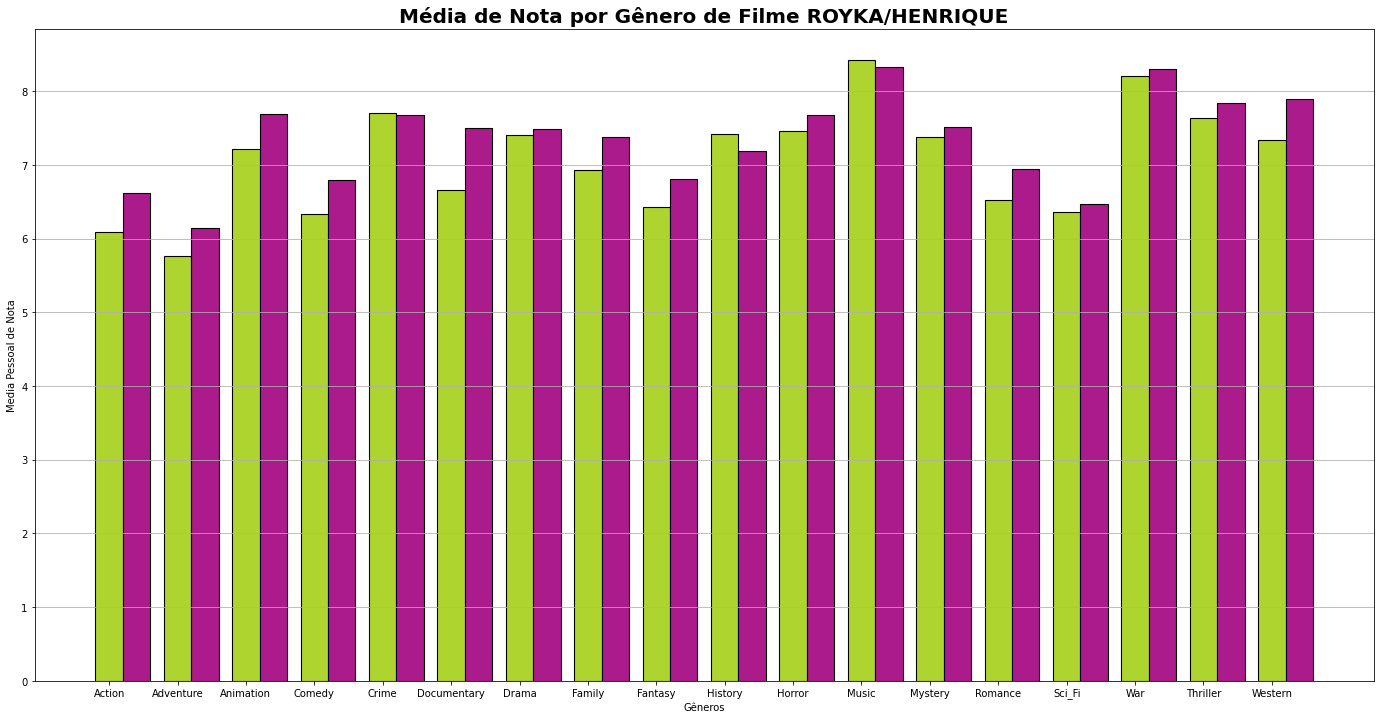

In [326]:
for i in range(0,len(List1)):
    for genre in List1[i]['genre_ids']:
        indice_do_genero_na_lista = procura_indice_na_lista(classes_de_generos,genres[f"{genre}"])
        classes_de_generos[indice_do_genero_na_lista]+List[i]['rating']
rating_por_genero1=[]
for i in range(0,len(classes_de_generos)):
    if classes_de_generos[i].quantidade != 0:
        rating_por_genero1.append(classes_de_generos[i].rating/classes_de_generos[i].quantidade)
    else:
        rating_por_genero1.append(0)
x2= [x+0.40 for x in x1]
grafico_duplo(x1,x2,"Gêneros",rating_por_genero,rating_por_genero1,"Media Pessoal de Nota","Média de Nota por Gênero de Filme ROYKA/HENRIQUE",xticks,("#AED42F",),("#AB1B8C"),tick_label=tick_label)
